In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import networkx as nx
from scipy.spatial import distance

In [3]:
from matplotlib.patches import ArrowStyle
from matplotlib.patches import Circle
from matplotlib.patches import ConnectionStyle
from matplotlib.patches import FancyArrowPatch

from matplotlib import cm

In [10]:
A = array([[.0, .1, .9, .0],
           [.0, .0, 0.,1.],
           [0., 0., 0., 1],
           [1., .0, .0, 0.]])

#A = abs(randn(4,4))
b = array([80, 400, 200, 500])

In [4]:
def _prepare_fig(pos):    

    pos_data = np.array(list(pos.values()))
    diameter = distance.pdist(pos_data).max()
    dd = diameter / 2 + 1
    
    fig = figure(figsize=(7+3, 7), frameon=False)
    ax = fig.add_subplot(111)
    ax.axis([-dd, dd+3, -dd, dd])
    #ax.set_axis_off()

    return ax

In [5]:
def _draw_nodes(G, pos, ax):
    
    indegree = array([deg for node, deg in G.in_degree], dtype=float)
    indegree /= indegree.sum()

    outdegree = array([deg for node, deg in G.out_degree], dtype=float)
    outdegree /= outdegree.sum()

    
    flare_kwargs = {'alpha'    : 0.2,
                    'edgecolor': (0., 0., 0., 1.),
                    'facecolor': None}
                  
    node_kwargs = {'alpha'    : 0.7,
                   'edgecolor': (0., 0., 0., 1.),
                   'facecolor': None,
                   'linewidth': 1}
    
    nodes = {}
    node_params = zip(pos.items(), indegree, outdegree)
    
    for i, ((label, xy), d_in, d_out) in enumerate(node_params):
        
        flare_kwargs['facecolor'] = 'C{}'.format(i)
        flare = Circle(xy, d_in + d_out, **flare_kwargs)
        
        node_kwargs['facecolor'] = 'C{}'.format(i)
        node = Circle(xy, d_in, **node_kwargs)
        
        ax.add_patch(flare)
        ax.add_patch(node)        

        font_style = {'size':15, 'weight':'bold'}
        text_kwargs = {'color': (0, 0, 0, .8),
                       'verticalalignment': 'center',
                       'horizontalalignment': 'center',
                       'fontdict': font_style}
        ax.text(*xy, i+1, **text_kwargs)
        
        nodes[label] = node

    return nodes

In [6]:
def _draw_edges(G, pos, nodes, ax):
    
    pointer = ArrowStyle.Simple(head_width=12, head_length=20)
    curved_edge = ConnectionStyle('arc3', rad=.2)
    
    arrow_kwargs = {'arrowstyle': pointer,
                    'connectionstyle': curved_edge,
                    'edgecolor': (0., 0., 0., .7),
                    'facecolor': (0., 0., 0., .7)}
    
    weights = array([w['weight'] for w in G.edges.values()])
    weights = exp(weights)
   
    cn = ((a, b, w) for ((a, b, attr), w) in zip(G.edges.data(), weights))
    
    edges = {}
    for i, (a, b, w) in enumerate(cn):
        edge = FancyArrowPatch(pos[a], pos[b], 
                               patchA=nodes[a], patchB=nodes[b],
                               linewidth=w, **arrow_kwargs)

        ax.add_patch(edge)
        edges[(a, b)] = edge
        
    return edges

In [7]:
def _legend(G, nodes, ax):
    legend_kwargs = {'fancybox': True, 
                     'fontsize': 14,
                     'bbox_to_anchor': (1.02, 1.0)}
    
    labels = [r'$f_c = {}$ Hz'.format(k) for k in G.nodes.keys()]
    ax.legend(nodes.values(), labels, **legend_kwargs, borderaxespad=0)

In [8]:
def draw_hmm(lambda_, gamma_):
    
    G = nx.MultiDiGraph()
    
    for i, from_state in enumerate(lambda_):
        G.add_node(from_state)
        for j, to_state in enumerate(lambda_):
            if A[i, j] != 0:
                G.add_edge(from_state, to_state, weight=A[i,j])
            
    pos = nx.layout.circular_layout(G, center=(0., 0.), scale=1.5)

    ax = _prepare_fig(pos)
    nodes = _draw_nodes(G, pos, ax)
    edges = _draw_edges(G, pos, nodes, ax)
    _legend(G, nodes, ax)
    
    return ax

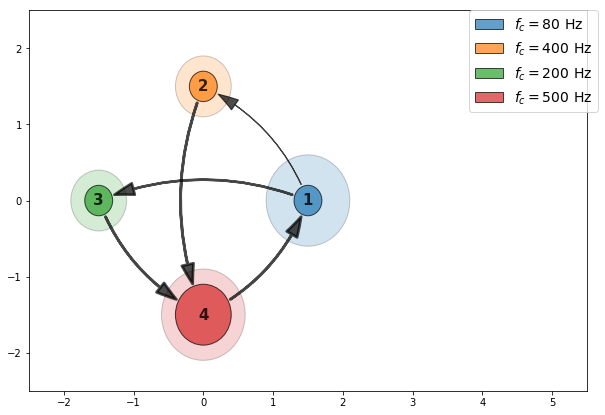

In [11]:
ax = draw_hmm(b, A)
#savefig('data/example.png')

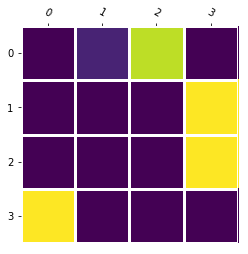

In [990]:
fig, ax = subplots(1)
ax.imshow(A)



# We want to show all ticks...
ax.set_xticks(np.arange(A.shape[1]))
ax.set_yticks(np.arange(A.shape[0]))
# ... and label them with the respective list entries.
ax.set_xticklabels(range(4))
ax.set_yticklabels(range(4))

# Let the horizontal axes labeling appear on top.
ax.tick_params(top=True, bottom=False,
               labeltop=True, labelbottom=False)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
         rotation_mode="anchor")

# Turn spines off and create white grid.
for edge, spine in ax.spines.items():
    spine.set_visible(False)

ax.set_xticks(np.arange(A.shape[1]+1)-.5, minor=True)
ax.set_yticks(np.arange(A.shape[0]+1)-.5, minor=True)
ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
ax.tick_params(which="minor", bottom=False, left=False)


ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
ax.tick_params(which="minor", bottom=False, left=False)

ax.tick_params(top=True, bottom=False,
               labeltop=True, labelbottom=False)

In [597]:
g.edges.keys()


KeysView(OutMultiEdgeView([(80, 400, 0), (80, 200, 0), (400, 500, 0), (200, 500, 0), (500, 80, 0)]))

In [1]:
import matplotlib.pyplot as plt
